In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets import interact, FloatSlider, IntSlider, Button, Output 
display(HTML("<style>.rendered_html.text_cell_render {max-width:600px; }</style>")) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Agent paths

Resourses and useful links:

 - ...

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from os import walk
from sklearn.utils import Bunch
from pathlib import Path
import json

data_path = Path("data")

In [12]:
def ls(path="./", absolute=False, posix=False):
    path = Path(path)
    _f = []
    _d = []
    for (dirpath, dirnames, filenames) in walk(path):
        _f.extend(filenames)
        _d.extend(dirnames)
        break

    f = _f
    d = _d
    
    if posix:
        f = listmap(Path, _f)
        d = listmap(Path, _d)    

    return Bunch(path=path, files=sorted(f), dirs=sorted(d), folders=sorted(d))

In [13]:
def load(fname, format=None):
    
    p = Path(fname)
    name = p.stem
    
    if format is None: format = p.suffix

    if format==".json":
        with open(p, 'r') as f:
            return json.load(f)
    else:
        raise Exception(f"Fileformat `{format}` not supported")
        

In [14]:
def dump(obj, fname, format=None):
    """
    Saves an object to a file.
    """

    p = Path(fname)
    name   = p.stem
    if format is None: format = p.suffix
        
    if format==".json":
        with open(p, 'w') as f: 
            json.dump(obj, f, indent=4)
            
    else:
        raise Exception(f"Fileformat `{format}` not supported")

In [15]:
# IGNORE THIS
for n in ls(data_path/"_house_expo_json").files[200:220]:
    !cp $data_path/_house_expo_json/$n $data_path/environment_examples

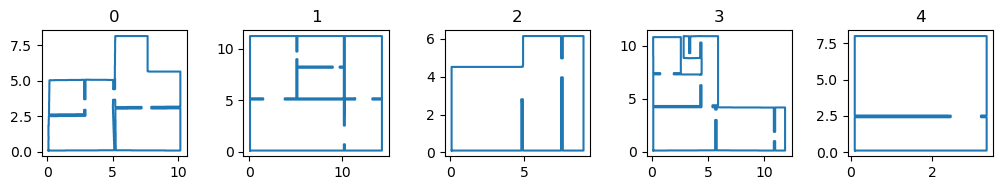

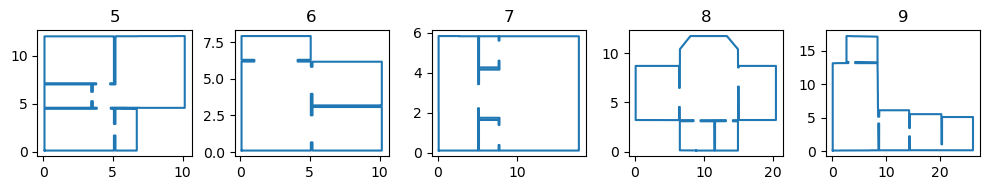

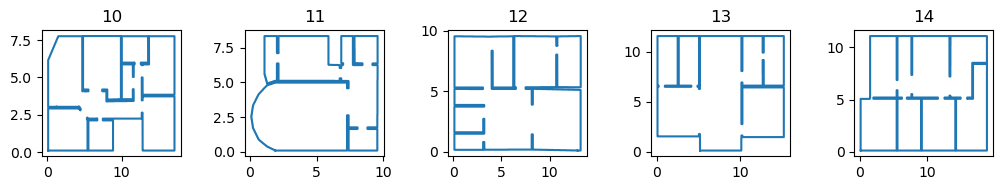

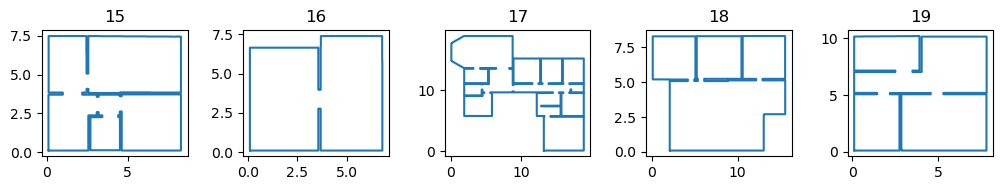

In [16]:
env_path = data_path/"environments"

for i in np.arange(20, step=5):

    fig, axs = plt.subplots(1,5, figsize=(10,2))
    map(lambda ax: ax.set_aspect(1), axs)
    
    for j in range(5):
        env_name = ls(env_path).files[i + j]
        d = load(env_path/env_name)
        verts = d['verts']
        verts.append(verts[0])
        axs[j].set_title(f"{i+j}")
        axs[j].plot(*np.array(d['verts']).T);

    
    
    
    plt.tight_layout()
    plt.show()

dict_keys(['verts', 'id', 'room_category', 'room_num', 'bbox'])


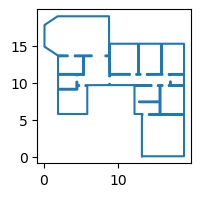

In [17]:
env_name = ls(env_path).files[17]
d = load(env_path/env_name)
print(d.keys())

verts = d['verts']
verts.append(verts[0])

plt.figure(figsize=(2,2))
plt.gca().set_aspect(1)
plt.plot(*np.array(d['verts']).T);

# Add dynamic elements

In [29]:
def box_verts(x, r=0.25):
    offsets = [
        np.array([-1,-1]),
        np.array([ 1,-1]),
        np.array([ 1, 1]),
        np.array([-1, 1]),
        np.array([-1,-1])
    ]
    return np.array([x+r*off for off in offsets])

In [32]:
# Not `%matplotlib inline`
%matplotlib tk 
# Code adapted from:
# https://stackoverflow.com/questions/25521120/store-mouse-click-event-coordinates-with-matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_aspect(1)
ax.plot(*np.array(d["verts"]).T)


clutter = [[]]
clutter_verts = [[]]
r = 0.25

def onclick(event):
    
    x, y = event.xdata, event.ydata
    p = np.array((x,y))
    
    clutter[-1].append(p)
    clutter_verts[-1].append(box_verts(p, r=r))


    for vs in clutter_verts[-1]:
        ax.plot(*np.array(vs).T, c="magenta")

    fig.canvas.draw()

def press(event):
    global fig, ax, r;


    if event.key == "+":
        r += 0.1
        
    if event.key == "-":
        r -= 0.1
        
    if event.key == "enter":
        clutter.append([])
        clutter_verts.append([])
        ax.clear()
        ax.plot(*np.array(d["verts"]).T)
        fig.canvas.draw()
        
    if event.key == "backspace":
        clutter[-1].pop()
        clutter_verts[-1].pop()
        ax.clear()
        ax.plot(*np.array(d["verts"]).T)
        fig.canvas.draw()
        
fig.canvas.mpl_connect("key_press_event", press)
fig.canvas.mpl_connect("button_press_event", onclick)

9

In [33]:
if len(clutter[-1]) == 0:
    clutter = clutter[:-1]
    clutter_verts = clutter_verts[:-1];

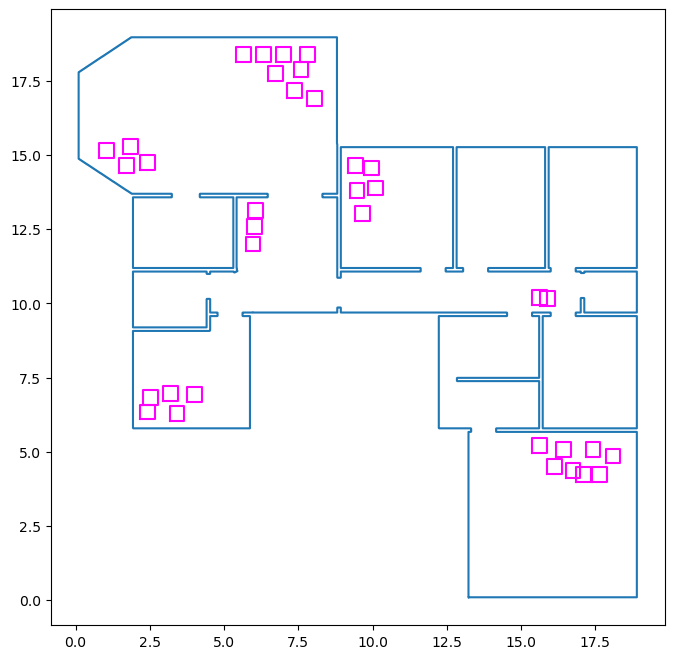

In [34]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_aspect(1)

ax.plot(*np.array(d["verts"]).T)

for v in clutter_verts[-1]:
    ax.plot(*np.array(v).T, c="magenta")

In [37]:
fname = "test_env_1.json"

dump(
    dict(
        env_name      = env_name, 
        verts         = verts, 
        clutter_verts = [vs.tolist() for vs in clutter_verts[-1]],
    ), 
    data_path/"task_inputs"/fname )

# Construct a path interactively

In [38]:
fname = "test_env_1.json"

d = load(data_path/"task_inputs"/fname)

In [58]:
# Not `%matplotlib inline`
%matplotlib tk 
# Code adapted from:
# https://stackoverflow.com/questions/25521120/store-mouse-click-event-coordinates-with-matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_aspect(1)

ax.plot(*np.array(d["verts"]).T)
for v in clutter_verts[-1]:
    ax.plot(*np.array(v).T, c="magenta")
    
scatter = ax.scatter([],[])
scatter.set_color(f"C1")

paths = [[]]
recording = True
c = 0

def onclick(event):
    x, y = event.xdata, event.ydata
    # print(f"x = {x}, y = {y}")

    global paths, scatter
    global fig, ax, c;
    
    if recording:
        paths[-1].append((x, y))
        scatter.set_offsets(np.array(paths[-1]))
        fig.canvas.draw()

def press(event):
    global paths
    global fig, ax, scatter, c;

    if event.key == "enter":
        print(f"#paths = #{len(paths)}...")
        if len(paths[-1]) > 0:
            paths.append([])
            scatter.remove()
            scatter = ax.scatter([],[])
            fig.canvas.draw()
        
fig.canvas.mpl_connect("key_press_event", press);
fig.canvas.mpl_connect("button_press_event", onclick);

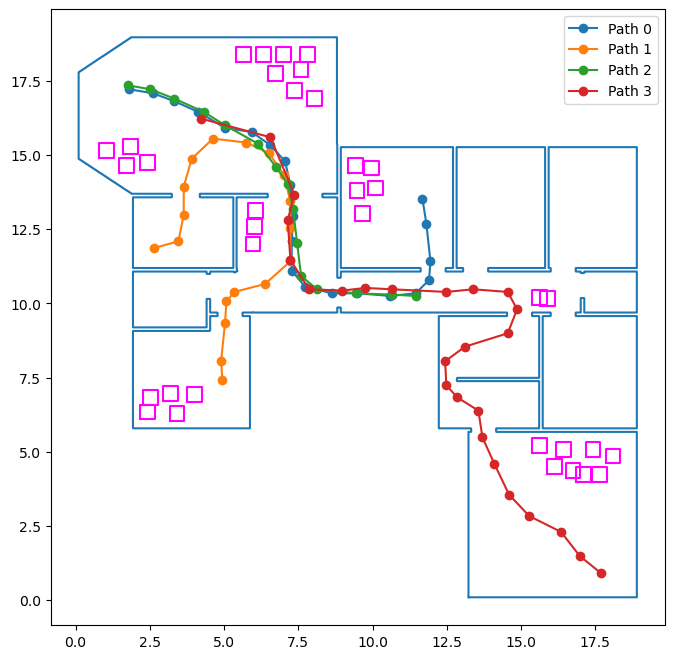

In [53]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_aspect(1)

ax.plot(*np.array(d["verts"]).T)

for v in clutter_verts[-1]:
    ax.plot(*np.array(v).T, c="magenta")
    
for i,path in enumerate(paths):
    ax.plot(*np.array(path).T, marker="o", c=f"C{i}", label=f"Path {i}")
    
ax.legend()

In [56]:
fname = "test_env_1.json"
dump(
    dict(
        env_name = env_name, 
        paths = paths, 
        verts = verts
    ), 
    data_path/"task_inputs"/fname
)